In [2]:
from utils import *
import matplotlib.pyplot as plt
import csv
from scipy.ndimage import gaussian_filter1d

In [ ]:
# calculate the conditional number of hilbert matrix
def hilbert_cond(size):
    vector_size = size
    vector_number = vector_size

    vectors = np.zeros((vector_number, vector_size))
    for i in range(vector_number):
        for j in range(vector_size):
            vectors[i, j] = 1 / (i + j + 1)
    H = vectors
    H_inv = np.linalg.inv(H)
    return np.linalg.norm(H) * np.linalg.norm(H_inv)

hilbert_cond(5)

In [ ]:
hilbert_matrix_QR_test(size=5)

In [ ]:
cgs_errors = []
mgs_errors = []
for size in range(2, 16):
    tmp1, tmp2 = ill_condition_QR_test(size, test_number=100, condition_number=1e2, use_classical_method=True)
    cgs_errors.append(tmp1)
    mgs_errors.append(tmp2)


In [66]:
cgs_errors = []
mgs_errors = []
qgs_errors = []
with open('gs_errors_compare_orthogonality.csv', mode='r') as file:
    reader = csv.reader(file)
    next(reader)
    for row in reader:
        row[1] = row[1][1: -1]
        row[2] = row[2][1: -1]
        row[3] = row[3][1: -1]
        row[1] = row[1].split(', ')
        row[2] = row[2].split(', ')
        row[3] = row[3].split(', ')
        for i in range(len(row[1])):
            row[1][i] = float(row[1][i])
            row[2][i] = float(row[2][i])
            row[3][i] = float(row[3][i])
        cgs_errors.append(row[1])
        mgs_errors.append(row[2])
        qgs_errors.append(row[3])


In [67]:
cgs_average = []
mgs_average = []
qgs_average = []
for i in range(14):
    cgs_average.append(np.average(cgs_errors[i]))
    mgs_average.append(np.average(mgs_errors[i]))
    qgs_average.append(np.average(qgs_errors[i]))

In [68]:
cgs_radius = []
mgs_radius = []
qgs_radius = []
# for i in range(14):
#     cgs_radius.append([cgs_average[i] - np.min(cgs_errors[i]), np.max(cgs_errors[i]) - cgs_average[i]])
#     mgs_radius.append([mgs_average[i] - np.min(mgs_errors[i]), np.max(mgs_errors[i]) - mgs_average[i]])
#     qqr_radius.append([qgs_average[i] - np.min(qgs_errors[i]), np.max(qgs_errors[i]) - qgs_average[i]])

for i in range(14):
    cgs_radius.append([0, np.max(cgs_errors[i]) - cgs_average[i]])
    mgs_radius.append([0, np.max(mgs_errors[i]) - mgs_average[i]])
    qgs_radius.append([0, np.max(qgs_errors[i]) - qgs_average[i]])

cgs_radius = np.array(cgs_radius).T
mgs_radius = np.array(mgs_radius).T
qgs_radius = np.array(qgs_radius).T

cgs_max = []
mgs_max = []
qgs_max = []
for i in range(14):
    cgs_max.append(np.max(cgs_errors[i]))
    mgs_max.append(np.max(mgs_errors[i]))
    qgs_max.append(np.max(qgs_errors[i]))

cgs_min = []
mgs_min = []
qgs_min = []
for i in range(14):
    cgs_min.append(np.min(cgs_errors[i]))
    mgs_min.append(np.min(mgs_errors[i]))
    qgs_min.append(np.min(qgs_errors[i]))

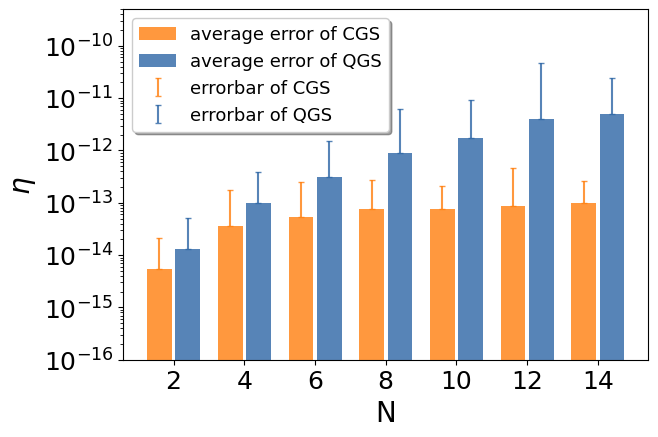

In [75]:
#plt.errorbar(range(2, 16), cgs_average, yerr=cgs_radius, label='CGS', marker='o', capsize=2)
#plt.errorbar(range(2, 16), mgs_average, yerr=mgs_radius, label='MGS', marker='o', capsize=2)
#plt.errorbar(range(2, 16), qgs_average, yerr=qqr_radius, label='QGS', marker='o', capsize=2)
# plt.plot(range(2, 16), cgs_average, marker='o', label='CGS')
# plt.plot(range(2, 16), mgs_average, marker='^', label='MGS')
# plt.plot(range(2, 16), qgs_average, marker='s', label='QGS')
# plot a 柱状图
tmp_cgs_average = []
tmp_mgs_average = []
tmp_qgs_average = []
tmp_cgs_radius = []
tmp_mgs_radius = []
tmp_qgs_radius = []
for i in range(7):
    tmp_cgs_average.append(cgs_average[i*2])
    tmp_mgs_average.append(mgs_average[i*2])
    tmp_qgs_average.append(qgs_average[i*2])
    tmp_cgs_radius.append(cgs_radius[:, i*2])
    tmp_mgs_radius.append(mgs_radius[:, i*2])
    tmp_qgs_radius.append(qgs_radius[:, i*2])

tmp_cgs_radius = np.array(tmp_cgs_radius).T
tmp_mgs_radius = np.array(tmp_mgs_radius).T
tmp_qgs_radius = np.array(tmp_qgs_radius).T

plt.figure(figsize=(7.5, 4.8))

plt.bar(np.linspace(1.6, 13.6, 7), tmp_cgs_average, label='average error of CGS', alpha=0.8, width=0.7, color = 'tab:orange')
#plt.bar(range(2, 16), mgs_average, label='MGS', alpha=0.5)
plt.bar(np.linspace(2.4, 14.4, 7), tmp_qgs_average, label='average error of QGS', alpha=0.8, width=0.7,color='#2d66a5')  
plt.errorbar(np.linspace(1.6, 13.6, 7), tmp_cgs_average, yerr=tmp_cgs_radius, label='errorbar of CGS', marker='o', capsize=2, fmt='none', color='tab:orange', alpha=0.8)
#plt.errorbar(range(2, 16), mgs_average, yerr=mgs_radius, label='MGS', marker='o', capsize=2)
plt.errorbar(np.linspace(2.4, 14.4, 7), tmp_qgs_average, yerr=tmp_qgs_radius, label='errorbar of QGS', marker='o', capsize=2, fmt='none', color='#2d66a5', alpha=0.8)


cgs_dots_x = []
cgs_dots_y = []
for i in range(14):
    for j in range(int(len(cgs_errors[i])/5)):
        cgs_dots_x.append(i+2)

for i in range(14):
    for j in range(int(len(cgs_errors[i])/5)):
        cgs_dots_y.append(cgs_errors[i][j])

qgs_dots_x = []
qgs_dots_y = []
for i in range(14):
    for j in range(int(len(cgs_errors[i])/5)):
        qgs_dots_x.append(i+2)

for i in range(14):
    for j in range(int(len(cgs_errors[i])/5)):
        qgs_dots_y.append(qgs_errors[i][j])
#plt.scatter(cgs_dots_x, cgs_dots_y, s=2, alpha=0.5, color='lightblue')
#plt.scatter(qgs_dots_x, qgs_dots_y, s=2, alpha=0.5, color='orange')

#plt.fill_between([1.9,2.1],1e-16,1e-14)
# for i in range(14):
#     plt.fill_between(range(2,16), cgs_min, cgs_max, color='lightblue', alpha=0.03)

# for i in range(14):
#     plt.fill_between(range(2,16), qgs_min, qgs_max, color='orange', alpha=0.03)
plt.ylim(1e-16, 5e-10)
plt.yscale('log')
plt.yticks([1e-16,1e-15,1e-14,1e-13,1e-12,1e-11,1e-10], fontsize=18)
plt.xticks(fontsize=18)
plt.xlabel('N', fontsize=20)
plt.ylabel('$\eta$', fontsize=20) 
plt.legend(loc='upper left', shadow=True, fontsize=13)
plt.subplots_adjust(bottom=0.15, left=0.2)
plt.savefig("gs_errors_compare.pdf", dpi=300, format='pdf')
plt.show()

In [76]:
conditional_number = []
qgs_errors_conditional = []
with open('gs_errors_conditional_orthogonality.csv', mode='r') as file:
    reader = csv.reader(file)
    next(reader)
    for row in reader:
        row[0] = float(row[0])
        row[1] = row[1][1: -1]
        row[1] = row[1].split(', ')
        for i in range(len(row[1])):
            row[1][i] = float(row[1][i])
        conditional_number.append(row[0])
        qgs_errors_conditional.append(row[1])

In [77]:
qgs_errors_conditional_average = []
qgs_errors_conditional_radius = []
for i in range(len(conditional_number)):
    qgs_errors_conditional_average.append(np.average(qgs_errors_conditional[i]))
    qgs_errors_conditional_radius.append([0, np.max(qgs_errors_conditional[i]) - qgs_errors_conditional_average[i]])

qqr_errors_conditional_radius = np.array(qgs_errors_conditional_radius).T

qgs_errors_conditional_max = []
qgs_errors_conditional_min = []
for i in range(len(conditional_number)):
    qgs_errors_conditional_max.append(np.max(qgs_errors_conditional[i]))
    qgs_errors_conditional_min.append(np.min(qgs_errors_conditional[i]))

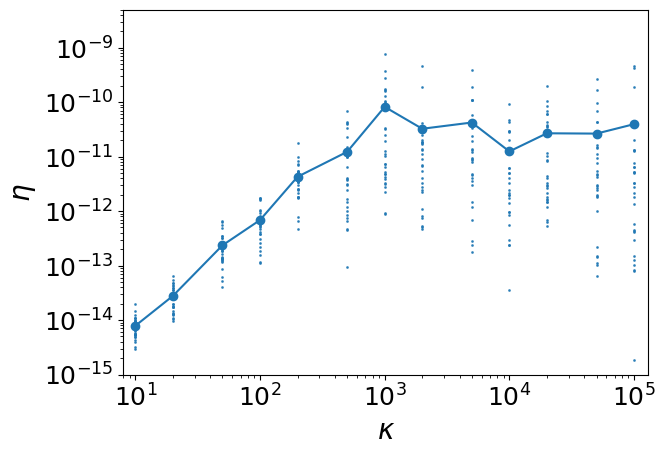

In [79]:
plt.figure(figsize=(7.5, 5))
plt.plot(conditional_number, qgs_errors_conditional_average, marker='o', label='QGS')
plt.xscale('log')
plt.yscale('log')

qgs_dots_x = []
qgs_dots_y = []
for i in range(len(conditional_number)):
    for j in range(int(len(qgs_errors_conditional[i]))):
        qgs_dots_x.append(conditional_number[i])

for i in range(len(conditional_number)):
    for j in range(int(len(qgs_errors_conditional[i]))):
        qgs_dots_y.append(qgs_errors_conditional[i][j])

plt.scatter(qgs_dots_x, qgs_dots_y, s=1, alpha=0.8, color='tab:blue')
plt.xlabel('$\kappa$', fontsize=20)
plt.ylabel('$\eta$', fontsize=20)
#plt.legend(loc='upper left', shadow=True, fontsize=14)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlim(8, 1.3*1e5)
plt.ylim(1e-15, 5e-9)
plt.subplots_adjust(bottom=0.15, left=0.2)
plt.savefig('gs_errors_conditional.pdf', dpi=300, format='pdf')
plt.show()

In [80]:
cgs_errors = []
qgs_errors = []
with open('qr_errors_size.csv', mode='r') as file:
    reader = csv.reader(file)
    next(reader)
    for row in reader:
        row[1] = row[1][1: -1]
        row[2] = row[2][1: -1]
        row[1] = row[1].split(', ')
        row[2] = row[2].split(', ')
        for i in range(len(row[1])):
            row[1][i] = float(row[1][i])
            row[2][i] = float(row[2][i])
        cgs_errors.append(row[1])
        qgs_errors.append(row[2])


In [81]:
cgs_average = []
qgs_average = []
for i in range(14):
    cgs_average.append(np.average(cgs_errors[i]))
    qgs_average.append(np.average(qgs_errors[i]))

In [82]:
cgs_radius = []
qgs_radius = []
# for i in range(14):
#     cgs_radius.append([cgs_average[i] - np.min(cgs_errors[i]), np.max(cgs_errors[i]) - cgs_average[i]])
#     mgs_radius.append([mgs_average[i] - np.min(mgs_errors[i]), np.max(mgs_errors[i]) - mgs_average[i]])
#     qqr_radius.append([qgs_average[i] - np.min(qgs_errors[i]), np.max(qgs_errors[i]) - qgs_average[i]])

for i in range(14):
    cgs_radius.append([0, np.max(cgs_errors[i]) - cgs_average[i]])
    qgs_radius.append([0, np.max(qgs_errors[i]) - qgs_average[i]])

cgs_radius = np.array(cgs_radius).T
qgs_radius = np.array(qgs_radius).T

cgs_max = []
qgs_max = []
for i in range(14):
    cgs_max.append(np.max(cgs_errors[i]))
    qgs_max.append(np.max(qgs_errors[i]))

cgs_min = []
qgs_min = []
for i in range(14):
    cgs_min.append(np.min(cgs_errors[i]))
    qgs_min.append(np.min(qgs_errors[i]))

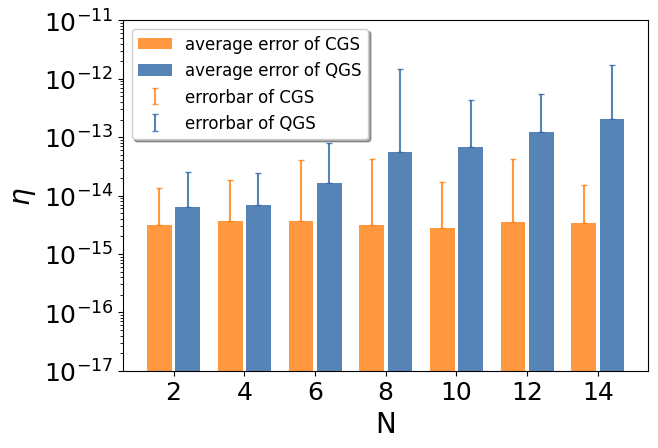

In [87]:
#plt.errorbar(range(2, 16), cgs_average, yerr=cgs_radius, label='CGS', marker='o', capsize=2)
#plt.errorbar(range(2, 16), mgs_average, yerr=mgs_radius, label='MGS', marker='o', capsize=2)
#plt.errorbar(range(2, 16), qgs_average, yerr=qqr_radius, label='QGS', marker='o', capsize=2)
# plt.plot(range(2, 16), cgs_average, marker='o', label='CGS')
# plt.plot(range(2, 16), mgs_average, marker='^', label='MGS')
# plt.plot(range(2, 16), qgs_average, marker='s', label='QGS')
# plot a 柱状图
tmp_cgs_average = []
tmp_mgs_average = []
tmp_qgs_average = []
tmp_cgs_radius = []
tmp_mgs_radius = []
tmp_qgs_radius = []
for i in range(7):
    tmp_cgs_average.append(cgs_average[i*2])
    ##tmp_mgs_average.append(mgs_average[i*2])
    tmp_qgs_average.append(qgs_average[i*2])
    tmp_cgs_radius.append(cgs_radius[:, i*2])
    #tmp_mgs_radius.append(mgs_radius[:, i*2])
    tmp_qgs_radius.append(qgs_radius[:, i*2])

tmp_cgs_radius = np.array(tmp_cgs_radius).T
#tmp_mgs_radius = np.array(tmp_mgs_radius).T
tmp_qgs_radius = np.array(tmp_qgs_radius).T

plt.figure(figsize=(7.5, 4.8))
plt.bar(np.linspace(1.6, 13.6, 7), tmp_cgs_average, label='average error of CGS', alpha=0.8, width=0.7, color = 'tab:orange')
#plt.bar(range(2, 16), mgs_average, label='MGS', alpha=0.5)
plt.bar(np.linspace(2.4, 14.4, 7), tmp_qgs_average, label='average error of QGS', alpha=0.8, width=0.7,color='#2d66a5')  
plt.errorbar(np.linspace(1.6, 13.6, 7), tmp_cgs_average, yerr=tmp_cgs_radius, label='errorbar of CGS', marker='o', capsize=2, fmt='none', color='tab:orange', alpha=0.8)
#plt.errorbar(range(2, 16), mgs_average, yerr=mgs_radius, label='MGS', marker='o', capsize=2)
plt.errorbar(np.linspace(2.4, 14.4, 7), tmp_qgs_average, yerr=tmp_qgs_radius, label='errorbar of QGS', marker='o', capsize=2, fmt='none', color='#2d66a5', alpha=0.8)


cgs_dots_x = []
cgs_dots_y = []
for i in range(14):
    for j in range(int(len(cgs_errors[i])/5)):
        cgs_dots_x.append(i+2)

for i in range(14):
    for j in range(int(len(cgs_errors[i])/5)):
        cgs_dots_y.append(cgs_errors[i][j])

qgs_dots_x = []
qgs_dots_y = []
for i in range(14):
    for j in range(int(len(cgs_errors[i])/5)):
        qgs_dots_x.append(i+2)

for i in range(14):
    for j in range(int(len(cgs_errors[i])/5)):
        qgs_dots_y.append(qgs_errors[i][j])
#plt.scatter(cgs_dots_x, cgs_dots_y, s=2, alpha=0.5, color='lightblue')
#plt.scatter(qgs_dots_x, qgs_dots_y, s=2, alpha=0.5, color='orange')

#plt.fill_between([1.9,2.1],1e-16,1e-14)
# for i in range(14):
#     plt.fill_between(range(2,16), cgs_min, cgs_max, color='lightblue', alpha=0.03)

# for i in range(14):
#     plt.fill_between(range(2,16), qgs_min, qgs_max, color='orange', alpha=0.03)
plt.ylim(1e-17, 1e-11)
plt.yscale('log')
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.xlabel('N', fontsize=20)
plt.ylabel('$\eta $', fontsize=20, rotation=90) 
plt.subplots_adjust(bottom=0.15, left=0.2)
plt.legend(loc='upper left', shadow=True, fontsize=12)
plt.savefig('qr_errors_compare.pdf', dpi=300, format='pdf')

In [ ]:
# condition_list = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000]
# error_list = [1e-1, 10 ** (-1.5), 1e-2, 10 ** (-2.5), 1e-3]#, 10 ** (-3.5), 1e-4]
# for tmp_error in error_list:
#     qqr_errors = []
#     for cond in condition_list:
#         tmp3 = ill_condition_QR_test(size=8, test_number=50, condition_number=cond, use_classical_method=False, error=tmp_error)
#         qqr_errors.append(tmp3)
#         print(f'condition number {cond} is done!')
#     print(f'error {tmp_error} is done!')
#     with open(f'./qr_error/qr_errors_conditional_{tmp_error}.csv', 'w', newline='') as csvfile:
#         writer = csv.writer(csvfile)
#         writer.writerow(['conditional_number', 'error'])
#         for i in range(len(condition_list)):
#             writer.writerow([condition_list[i], qqr_errors[i]])


# with open('qr_errors_conditional.csv', 'w', newline='') as csvfile:
#     writer = csv.writer(csvfile)
#     writer.writerow(['conditional_number', 'error'])
#     for i in range(len(condition_list)):
#         writer.writerow([condition_list[i], qqr_errors[i]])

In [3]:
conditional_number = [2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000]
error_list = [1e-1, 10 ** (-1.5), 1e-2, 10 ** (-2.5), 1e-3, 10 ** (-3.5), 1e-4]
qqr_errors_conditional = []
for tmp_error in error_list:
    tmp = []
    with open(f'./qr_error/qr_errors_conditional_{tmp_error}.csv', mode='r') as file:
        reader = csv.reader(file)
        next(reader)
        for row in reader:
            row[1] = row[1][1: -1]
            row[1] = row[1].split(', ')
            for i in range(len(row[1])):
                row[1][i] = float(row[1][i])
                row[1][i] = np.log10(row[1][i])
            tmp.append(row[1])
    qqr_errors_conditional.append(tmp)

# print(conditional_number)

In [4]:
qqr_errors_conditional_average = []

for i in range(len(error_list)):
    tmp = []
    for j in range(len(conditional_number)):
        tmp.append(10 ** np.average(qqr_errors_conditional[i][j]))
    qqr_errors_conditional_average.append(tmp)

In [5]:
from scipy.interpolate import interp1d

def tmp_plot(x, y, i):
    x_new = np.linspace(x.min(),x.max(),len(conditional_number))

    func = interp1d(x,y,kind='cubic')

    y_new = func(x_new)
    print(x_new)
    
    if i == 0:
        plt.plot(x_new, y_new, marker='o', label='$\epsilon$ = $10^{-1}$', c='tab:orange')

    if i == 1:
        plt.plot(x_new, y_new, marker='o', label='$\epsilon$ = $10^{-1.5}$', c='#F2CD89')

    if i == 2:
        plt.plot(x_new, y_new, marker='o', label='$\epsilon$ = $10^{-2}$', c='#C3BC6C')

    if i == 3:
        plt.plot(x_new, y_new, marker='o', label='$\epsilon$ = $10^{-2.5}$', c='#95BE7E')

    if i == 4:
        plt.plot(x_new, y_new, marker='o', label='$\epsilon$ = $10^{-3}$', c='#7CBC8A')

    if i == 5:
        plt.plot(x_new, y_new, marker='o', label='$\epsilon$ = $10^{-3.5}$', c='#43BC97')

    if i == 6:
        plt.plot(x_new, y_new, marker='o', label='$\epsilon$ = $10^{-4}$', c='#2d66a5')

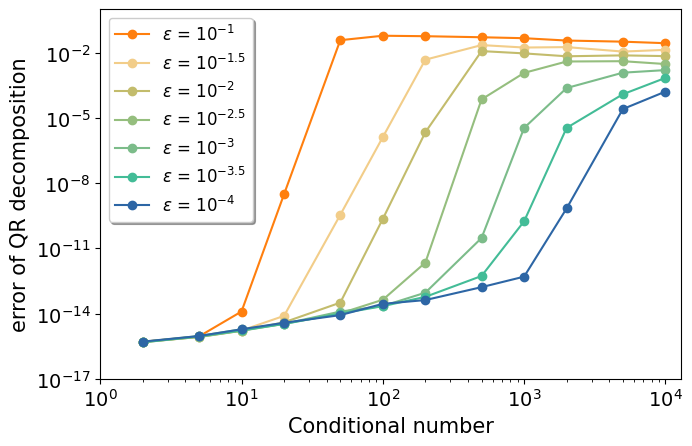

In [102]:
plt.figure(figsize=(7.5, 4.8))

# for i in range(7):
#     x = np.array(conditional_number)
#     y = np.array(qqr_errors_conditional_average[i])
#     tmp_plot(x, y, i)
plt.plot(conditional_number, qqr_errors_conditional_average[0], marker='o', label='$\epsilon$ = $10^{-1}$', c='tab:orange')
plt.plot(conditional_number, qqr_errors_conditional_average[1], marker='o', label='$\epsilon$ = $10^{-1.5}$', c='#F2CD89')
plt.plot(conditional_number, qqr_errors_conditional_average[2], marker='o', label='$\epsilon$ = $10^{-2}$', c='#C3BC6C')
plt.plot(conditional_number, qqr_errors_conditional_average[3], marker='o', label='$\epsilon$ = $10^{-2.5}$', c='#95BE7E')
plt.plot(conditional_number, qqr_errors_conditional_average[4], marker='o', label='$\epsilon$ = $10^{-3}$', c='#7CBC8A')
plt.plot(conditional_number, qqr_errors_conditional_average[5], marker='o', label='$\epsilon$ = $10^{-3.5}$', c='#43BC97')
plt.plot(conditional_number, qqr_errors_conditional_average[6], marker='o', label='$\epsilon$ = $10^{-4}$', c='#2d66a5')
plt.xscale('log')

plt.yscale('log')
plt.xlabel('Conditional number', fontsize=15)
plt.ylabel('error of QR decomposition', fontsize=15)
plt.legend(loc='upper left', shadow=True, fontsize=12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim(1, 1.3*1e4)
plt.ylim(1e-17, 1)

plt.show()


In [7]:
from mpl_toolkits.mplot3d import Axes3D  # 空间三维画图

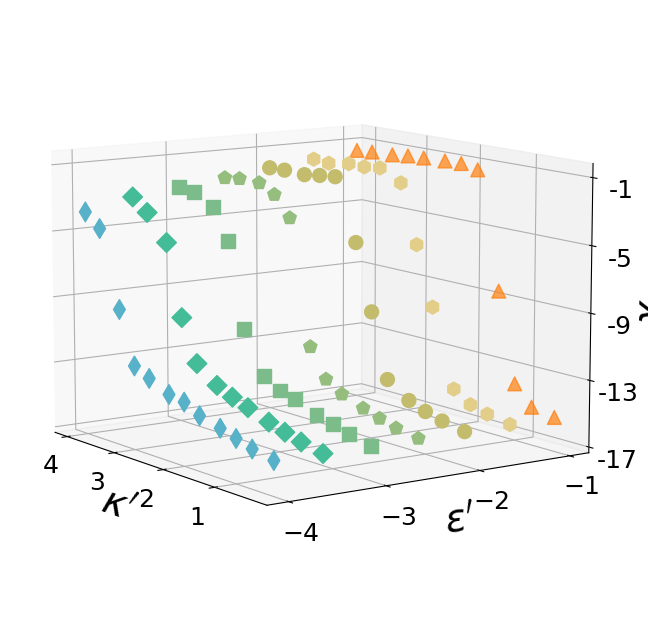

In [10]:
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig)
fig.add_axes(ax)

x = error_list
y = conditional_number

for i in range(len(error_list)):
    tmp_x = [np.log10(x[i]) for _ in range(len(conditional_number))]
    tmp_x = np.array(tmp_x).flatten()
    tmp_y = [np.log10(y[j]) for j in range(len(conditional_number))]
    tmp_y = np.array(tmp_y).flatten()
    z = qqr_errors_conditional_average[i]
    tmp_z = [np.log10(z[j]) for j in range(len(z))]
    tmp_z = np.array(tmp_z).flatten()
    if i == 0:
        scatter = ax.scatter3D(tmp_y, tmp_x, tmp_z, c='tab:orange', alpha=0.7, s=100, marker='^')#, label=f'error = {error_list[i]}')
    if i == 1:
        scatter = ax.scatter3D(tmp_y, tmp_x, tmp_z, c='#E2CD89', alpha=1, s=100, marker='h')
    if i == 2:
        scatter = ax.scatter3D(tmp_y, tmp_x, tmp_z, c='#C3BC6C', alpha=1, s=100, marker='o')
    if i == 3:
        scatter = ax.scatter3D(tmp_y, tmp_x, tmp_z, c='#95BE7E', alpha=1, s=100, marker='p')
    if i == 4:
        scatter = ax.scatter3D(tmp_y, tmp_x, tmp_z, c='#7CBC8A', alpha=1, s=100, marker='s')
    if i == 5:
        scatter = ax.scatter3D(tmp_y, tmp_x, tmp_z, c='#43BC97', alpha=1, s=100, marker='D')
    if i == 6:
        scatter = ax.scatter3D(tmp_y, tmp_x, tmp_z, c='#57B1C9', alpha=1, s=100, marker='d')

#plt.yscale('log')
ax.view_init(elev=10, azim=-35)

ax.set_ylabel('$\epsilon^{\prime} $', fontsize=28)
ax.set_xlabel('$\kappa^{\prime}$', fontsize=28)
ax.set_zlabel('$\chi $', fontsize=28, rotation=0)

plt.gca().invert_xaxis()
ax.set_xticks([1,2,3,4])
ax.set_yticks([-4, -3,-2,-1])
ax.set_zticks([-17, -13, -9, -5, -1])#, fontsize=15)
ax.set_zticklabels([-17, -13, -9, -5, -1], fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
# set x, y, z scale to log
# ax.set_xscale('log')
# ax.set_yscale('log')
# ax.set_zscale('log')

# ax.set_xticks([2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000])

# #ax.set_xscale('log')
# # ax.set_xlim(1, 1.3*1e4)
# # ax.set_ylim(1e-4, 1e-1)
# ax.set_zticks([1e-17, 1e-15, 1e-13, 1e-11, 1e-9, 1e-7, 1e-5, 1e-3, 1e-1])
# ax.set_zscale('log')
plt.savefig('qr_errors_conditional.pdf', dpi=300, format='pdf')
plt.show()